In [20]:
import pandas as pd

# Load the dataset (replace 'your_dataset.csv' with the file path)
df = pd.read_csv("data/dataset.csv")

# Display the first few rows to understand the structure
print(df.head())


  Agency Type Distribution Channel Product Name Claim  Duration  \
0    Airlines               Online   Basic Plan    No     104.0   
1    Airlines               Online   Basic Plan    No       2.0   
2    Airlines               Online   Basic Plan    No       3.0   
3    Airlines               Online   Value Plan    No       1.0   
4    Airlines               Online   Basic Plan    No      14.0   

                 Destination  Net Sales  Commission (in value) Gender    Age  
0  TAIWAN, PROVINCE OF CHINA       35.0                  12.25      M   34.0  
1                   MALAYSIA       18.0                   6.30      M   44.0  
2                   MALAYSIA       18.0                   6.30      M   45.0  
3                      INDIA       62.0                  24.80      M  118.0  
4                  HONG KONG       26.0                   9.10      F   43.0  


In [21]:
# Check for missing values and calculate the percentage
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

# Combine into a single DataFrame for better readability
missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
}).sort_values(by='Percentage', ascending=False)

# Display the summary
print(missing_summary)

                       Missing Values  Percentage
Agency Type                         0         0.0
Distribution Channel                0         0.0
Product Name                        0         0.0
Claim                               0         0.0
Duration                            0         0.0
Destination                         0         0.0
Net Sales                           0         0.0
Commission (in value)               0         0.0
Gender                              0         0.0
Age                                 0         0.0


In [22]:
# Drop a single column by name
df.dropna()


,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commission (in value),Gender,Age
0,Airlines,Online,Basic Plan,No,104.0,"TAIWAN, PROVINCE OF CHINA",35.0,12.25,M,34.0
1,Airlines,Online,Basic Plan,No,2.0,MALAYSIA,18.0,6.30,M,44.0
2,Airlines,Online,Basic Plan,No,3.0,MALAYSIA,18.0,6.30,M,45.0
3,Airlines,Online,Value Plan,No,1.0,INDIA,62.0,24.80,M,118.0
4,Airlines,Online,Basic Plan,No,14.0,HONG KONG,26.0,9.10,F,43.0
...,...,...,...,...,...,...,...,...,...,...
4156,Airlines,Online,Bronze Plan,No,15.0,SINGAPORE,23.5,5.88,F,69.0
4157,Airlines,Online,Bronze Plan,No,20.0,SINGAPORE,27.0,6.75,F,51.0
4158,Airlines,Online,Bronze Plan,No,16.0,SINGAPORE,27.0,6.75,F,34.0
4159,Airlines,Online,Basic Plan,No,15.0,MALAYSIA,18.0,6.30,M,35.0


In [23]:
df.dtypes

Agency Type               object
Distribution Channel      object
Product Name              object
Claim                     object
Duration                 float64
Destination               object
Net Sales                float64
Commission (in value)    float64
Gender                    object
Age                      float64
dtype: object

In [24]:
categorical_cols = ['Agency Type', 'Distribution Channel', 'Product Name',
                    'Claim', 'Destination', 'Gender']

for col in categorical_cols:
    df[col] = df[col].astype('category') 

# Verify the changes
print(df.dtypes)

Agency Type              category
Distribution Channel     category
Product Name             category
Claim                    category
Duration                  float64
Destination              category
Net Sales                 float64
Commission (in value)     float64
Gender                   category
Age                       float64
dtype: object


In [25]:

df['Claim'] = df['Claim'].map({'Yes': 1, 'No': 0})

print(df['Claim'].unique())

df['Claim'] = df['Claim'].astype(int)

df.dtypes

[0, 1]
Categories (2, int64): [0, 1]


Agency Type              category
Distribution Channel     category
Product Name             category
Claim                       int64
Duration                  float64
Destination              category
Net Sales                 float64
Commission (in value)     float64
Gender                   category
Age                       float64
dtype: object

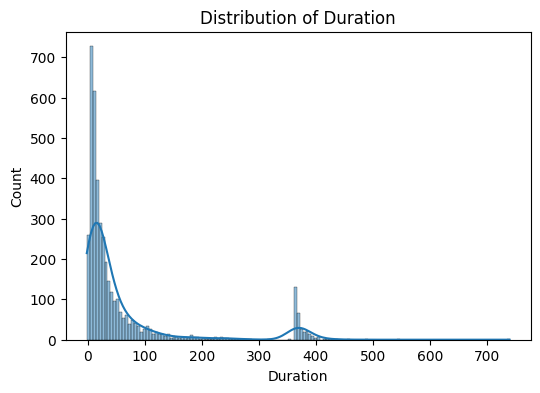

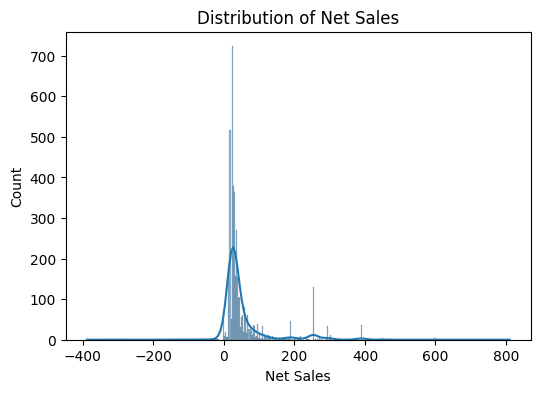

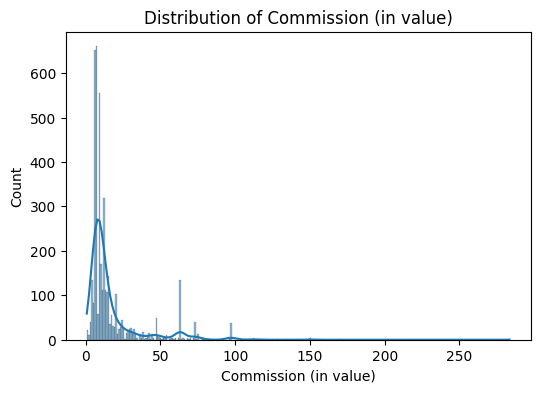

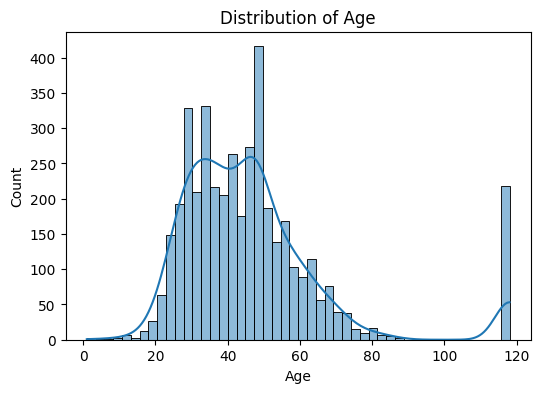

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = ['Duration', 'Net Sales', 'Commission (in value)', 'Age']

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

In [29]:
from scipy.stats import skew

for col in numeric_cols:
    value = skew(df[col].dropna())
    print(f'{col} skewness: {value:.2f}')


Duration skewness: 2.59
Net Sales skewness: 3.07
Commission (in value) skewness: 3.38
Age skewness: 1.90


In [30]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')
df[['Duration', 'Net Sales', 'Commission (in value)', 'Age']] = pt.fit_transform(
    df[['Duration', 'Net Sales', 'Commission (in value)', 'Age']])


In [31]:
for col in numeric_cols:
    value = skew(df[col].dropna())
    print(f'{col} skewness: {value:.2f}')

Duration skewness: -0.03
Net Sales skewness: 1.16
Commission (in value) skewness: -0.06
Age skewness: -0.05


In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [34]:
print(df[numeric_cols].mean())
print(df[numeric_cols].std())

Duration                 2.219912e-17
Net Sales               -1.024575e-17
Commission (in value)   -2.561437e-18
Age                     -5.976687e-18
dtype: float64
Duration                 1.00012
Net Sales                1.00012
Commission (in value)    1.00012
Age                      1.00012
dtype: float64


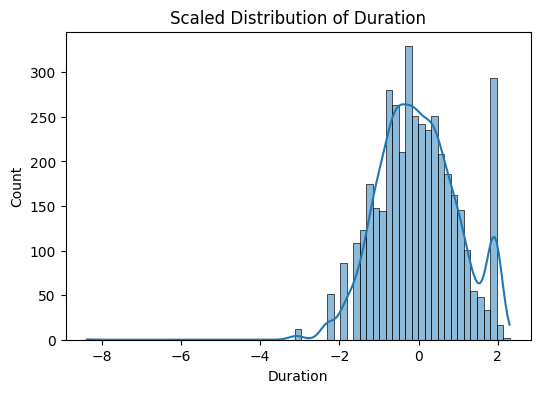

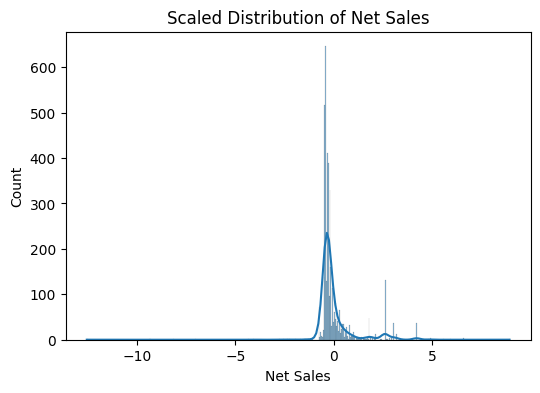

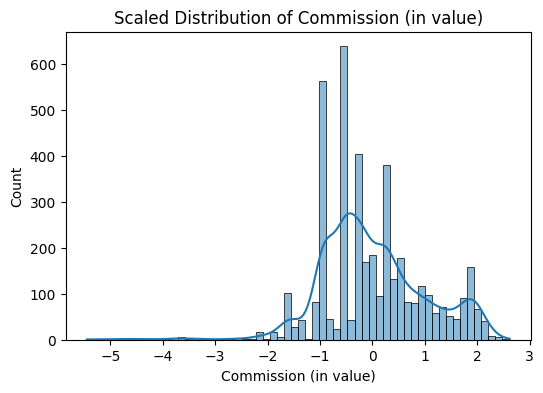

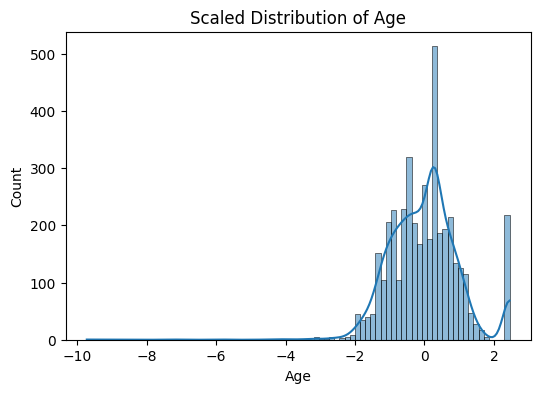

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Scaled Distribution of {col}')
    plt.show()


## Step 7: Encode Categorical Variables

In [36]:
df_onehot = df.copy()
df_label = df.copy()

In [37]:
df_onehot = pd.get_dummies(df_onehot,
                           columns=['Agency Type', 'Distribution Channel', 'Product Name', 'Destination', 'Gender'],
                           drop_first=True)


In [38]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['Agency Type', 'Distribution Channel', 'Product Name', 'Destination', 'Gender']

for col in categorical_cols:
    le = LabelEncoder()
    df_label[col] = le.fit_transform(df_label[col])


## Step 8: Modeling & Evaluation

In [39]:
from sklearn.model_selection import train_test_split

X = df_onehot.drop('Claim', axis=1)  # or df_label for trees
y = df_onehot['Claim']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [42]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

X = df_label.drop('Claim', axis=1)
y = df_label['Claim']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest:\n", classification_report(y_test, y_pred_rf))

Random Forest:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       811
           1       0.00      0.00      0.00        22

    accuracy                           0.97       833
   macro avg       0.49      0.50      0.49       833
weighted avg       0.95      0.97      0.96       833



In [43]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print(y_train_res.value_counts())  # Confirm balanced classes


Claim
0    3249
1    3249
Name: count, dtype: int64


In [44]:
rf = RandomForestClassifier(class_weight='balanced', random_state=42)

In [45]:
print(y_train_res.value_counts())

Claim
0    3249
1    3249
Name: count, dtype: int64


In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_res, y_train_res)

y_pred_rf = rf.predict(X_test)

print("Random Forest after SMOTE:\n", classification_report(y_test, y_pred_rf))

Random Forest after SMOTE:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97       811
           1       0.03      0.05      0.04        22

    accuracy                           0.94       833
   macro avg       0.50      0.50      0.50       833
weighted avg       0.95      0.94      0.94       833



In [47]:
rf = RandomForestClassifier(class_weight='balanced', random_state=42)

In [49]:
from xgboost import XGBClassifier

xgb = XGBClassifier(scale_pos_weight=round(len(y_train) / y_train.value_counts()[1]),
                    eval_metric='logloss',
                    random_state=42)

xgb.fit(X_train_res, y_train_res)
y_pred_xgb = xgb.predict(X_test)

print("XGBoost after SMOTE:\n", classification_report(y_test, y_pred_xgb))


XGBoost after SMOTE:
               precision    recall  f1-score   support

           0       0.98      0.91      0.94       811
           1       0.05      0.18      0.08        22

    accuracy                           0.89       833
   macro avg       0.51      0.54      0.51       833
weighted avg       0.95      0.89      0.92       833



In [50]:
from sklearn.metrics import precision_recall_curve

y_probs = xgb.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)


In [52]:
from sklearn.metrics import precision_recall_curve, f1_score

# Get prediction probabilities for the positive class (1 = Claim)
y_probs = xgb.predict_proba(X_test)[:, 1]

# Compute precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

# Compute F1 scores at each threshold
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-6)  # to avoid division by zero

# Find the threshold that gives the best F1
best_idx = f1_scores.argmax()
best_threshold = thresholds[best_idx]

print(f"Best F1-score: {f1_scores[best_idx]:.4f} at threshold = {best_threshold:.4f}")


Best F1-score: 0.1408 at threshold = 0.0157


In [53]:
y_pred_opt = (y_probs >= best_threshold).astype(int)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_opt))


              precision    recall  f1-score   support

           0       0.99      0.78      0.87       811
           1       0.08      0.68      0.14        22

    accuracy                           0.78       833
   macro avg       0.53      0.73      0.51       833
weighted avg       0.97      0.78      0.85       833



In [56]:
import joblib

# Save the trained model to a file
joblib.dump(xgb, 'models/xgboost_claim_model.pkl')

['models/xgboost_claim_model.pkl']

In [58]:
xgb_loaded = joblib.load('models/xgboost_claim_model.pkl')


In [59]:
joblib.dump(scaler, 'models/standard_scaler.pkl')            # If used
joblib.dump(pt, 'models/yeo_johnson_transformer.pkl')         # If used
joblib.dump(sm, 'models/smote_instance.pkl')                  # Optional

['models/smote_instance.pkl']

In [60]:
best_threshold  # This is your tuned threshold

# Save threshold to a simple file
with open('models/xgb_threshold.txt', 'w') as f:
    f.write(str(best_threshold))


In [61]:
xgb = joblib.load('models/xgboost_claim_model.pkl')

with open('models/xgb_threshold.txt', 'r') as f:
    threshold = float(f.read())
